# Exercise 1 - Linear Regression

In [268]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

Create a dataframe from the text file with data

In [269]:
from pathlib import Path
path = Path(r'C:\Users\Igor Kolasa\ML-exercises\data\ex1data1.txt')
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Let's plot our dataset

<AxesSubplot:xlabel='Population', ylabel='Profit'>

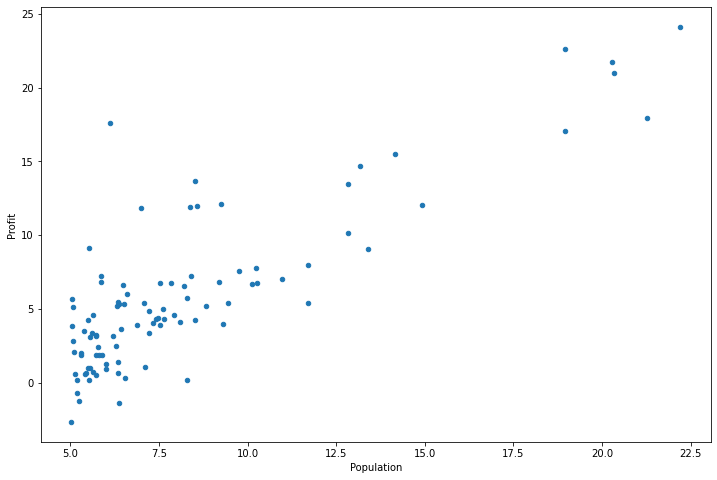

In [270]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

Add column of ones to dataset

In [271]:
data.insert(0, 'Ones', 1)

Split dataset into trainig data and target variable
 

In [272]:
X = data.iloc[:,0:2]
y = data.iloc[:,2]

In [273]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [274]:
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: Profit, dtype: float64

Transform data into numpy arrays for further computations


In [275]:
X = X.to_numpy()
y = y.to_numpy()

# Convert 1D array y to 2D array (column vector)
y = np.reshape(y, (-1, 1))

# Initialize fitting parameters
theta = np.zeros((2,1))

Define function to compute cost

In [276]:
def compute_cost(X, y, theta):
    # number of training examples
    m = X.shape[0] 

    # hypothesis
    h = np.dot(X, theta)

    error = h - y
    error_sqr = np.square(error)
    return  np.sum(error_sqr) / (2 * m)

In [277]:
J = compute_cost(X, y, theta)
print(J)

32.072733877455676


Implement gradient descent

In [278]:
def gradient_descent(X, y, theta, l_rate = 0.01, num_iters = 1500):
    # number of training examples
    m = X.shape[0]

    for i in range(num_iters):
        # hypothesis
        h = np.dot(X, theta)

        error = h - y
        theta = theta - l_rate * np.dot(X.T, error) / m
    
    return theta

In [279]:
theta = gradient_descent(X, y, theta)
print(theta)

[[-3.63029144]
 [ 1.16636235]]
